<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 2. <b>Кросс-валидация, регуляризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Куприянов" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>30 апреля 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [31]:
#0) Подключение библиотек

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from numpy.polynomial.polynomial import polyval

%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<p>1. Загрузка исходных данных</p>

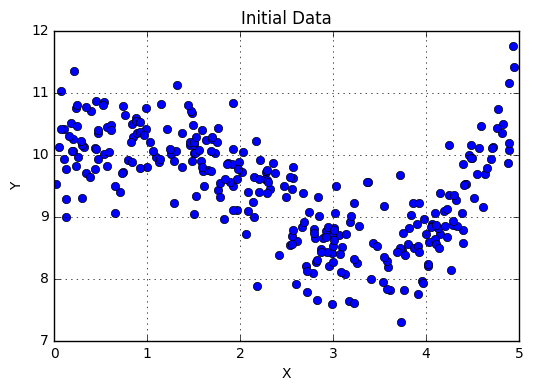

In [4]:
df = pd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values
plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [5]:
# Способ 1
x = x.reshape(-1,1)
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, 
                                                                               y,
                                                                               test_size=0.3,
                                                                               random_state=0)

x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init,
                                                                   y_train_init,
                                                                   test_size=0.25,
                                                                   random_state=0)
# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

Несколько вспомогательных методов.

In [6]:
lin_reg = LinearRegression(normalize=True)
lin_reg = lin_reg.fit(x_train, y_train)

def plot_deg_train_val(name, x_label, y_label, deg, train, val, height=4, width=8):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg, rotation=90)
    plt.title(name)
    plt.plot(deg, train, lw=2)
    plt.plot(deg, val, lw=2)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=16)
    plt.legend(["Train", "Val"])
    plt.grid(True)
    plt.show()
    
def lin_regr_fit_metrics(deg, x, y, x_val, y_val, metric=0):
    pl_lin_reg = Pipeline([("plF", PolynomialFeatures(degree=deg)), ("lr", lin_reg)])
    pl_lin_reg = pl_lin_reg.fit(x, y)
    if metric == 1:
        return mean_squared_error(y, pl_lin_reg.predict(x)), mean_squared_error(y_val, pl_lin_reg.predict(x_val))
    elif metric == 2:
#         return cross_val_score(lin_reg, x, y, scoring='r2'), \
#                cross_val_score(lin_reg, x_val, y_val, scoring='r2');
        return r2_score(y, pl_lin_reg.predict(x)), r2_score(y_val, pl_lin_reg.predict(x_val))
    else:
        return pl_linReg.score(x, y), pl_lin_reg.score(x_val, y_val)

<p>3. Обучение</p>

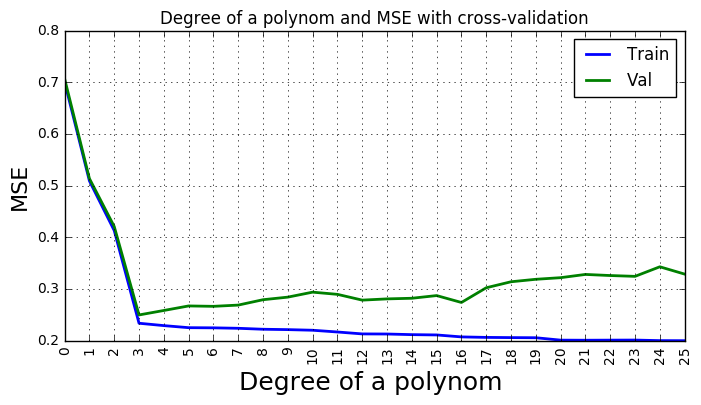

In [7]:
#Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

train_list, val_list = [], []

for i in range(0, 26):
    train_deg = []
    val_deg = []
    for train, val in kf:
        train_res, val_res = lin_regr_fit_metrics(i,
                                                x_train_init[train],
                                                y_train_init[train],
                                                x_train_init[val],
                                                y_train_init[val],
                                                metric=1)
        train_deg.append(train_res)
        val_deg.append(val_res)
        
    train_list.append(np.mean(train_deg))
    val_list.append(np.mean(val_deg))
    
plot_deg_train_val('Degree of a polynom and MSE with cross-validation', 'Degree of a polynom ', 'MSE', range(0, 26), train_list, val_list)

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

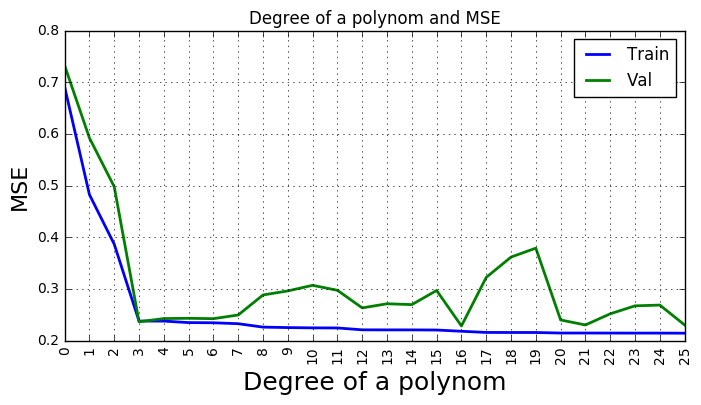

In [8]:
train, val = [], []

for i in range(0, 26):
    train_res, val_res = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val, metric=1)
    train.append(train_res)
    val.append(val_res)

plot_deg_train_val('Degree of a polynom and MSE', 'Degree of a polynom', 'MSE', range(0, 26), train, val)

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

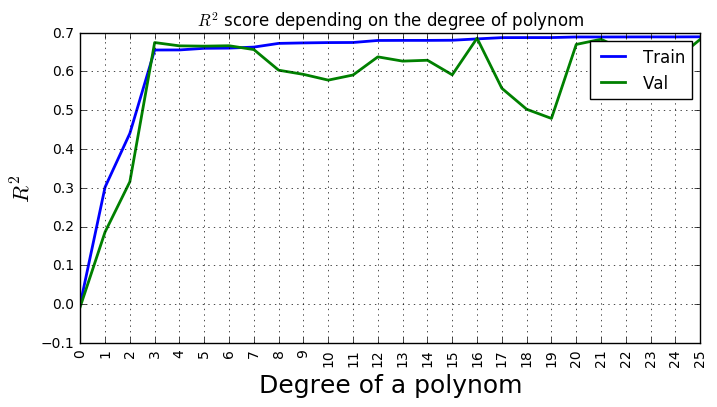

In [9]:
train, val = [], []

for i in range(0, 26):
    train_res, val_res = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val, metric=2)
    train.append(np.mean(train_res))
    val.append(np.mean(val_res))

    
plot_deg_train_val('$R^2$ score depending on the degree of polynom', 'Degree of a polynom', '$R^2$', range(0, 26), train, val)

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [10]:
# наилучшая степень для полинома: 3
pl_lin_regr = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", lin_reg)])
pl_lin_regr = pl_lin_regr.fit(x_train_init, y_train_init)

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [11]:
mean_squared_error(y_test, pl_lin_regr.predict(x_test))

0.22297660572404271

<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

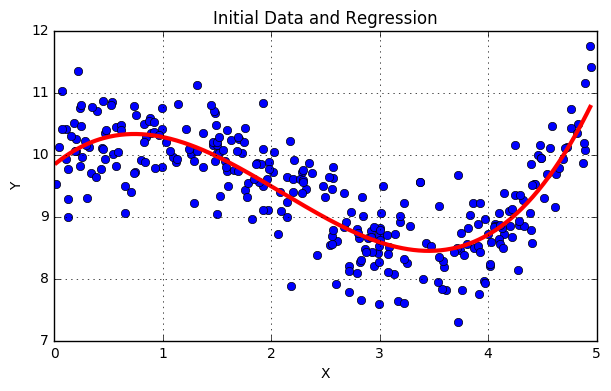

In [12]:
x_plot = np.arange(min(x), max(x), 0.01)

plt.figure(1, figsize=[7, 4])
plt.title("Initial Data and Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.plot(x_plot, pl_lin_regr.predict(x_plot.reshape(-1,1)), color='red', lw=3)
plt.grid(True)
plt.show()

<p>9. Сравнение результатов для различных способов</p>

In [13]:
# Способ KFold считается лучше, при нем обычно mse меньше, соответственно модель более точна

<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

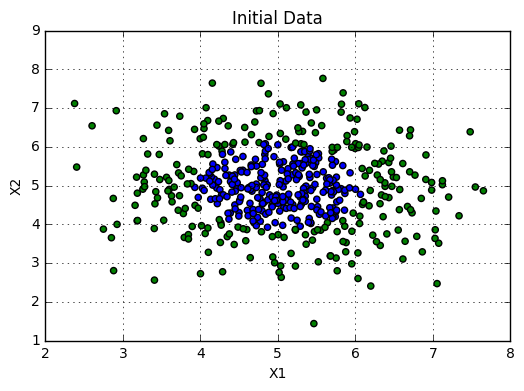

In [14]:
df = pd.read_csv("data/Cl_A5_V"+str(2)+".csv") #variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [15]:
# Способ 1
x = list(zip(df['X1'], df['X2']))
y = df['Y'].values
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0
kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)
#Ваш код

<p>3. Обучение</p>

In [16]:
#Параметры классификатора
#penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="lbfgs", random_state=12345

log_reg = LogisticRegression(penalty="l2", fit_intercept=True, C=1e5, solver="lbfgs", random_state=12345)
log_reg = log_reg.fit(x_train, y_train)

def log_regr_score(x_train, y_train, x_val, y_val, deg=4, n=100):
    pl_log_reg = Pipeline([("plF", PolynomialFeatures(degree=deg)),
                          ("lgr", LogisticRegression(penalty="l2", fit_intercept=True,
                                                     max_iter=n, C=1e5, solver="lbfgs", random_state=12345))])
    pl_log_reg = pl_log_reg.fit(x_train, y_train)
    
    return pl_log_reg.score(x_train, y_train), pl_log_reg.score(x_val, y_val)

# Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)


# train_list, val_list = [], []

# for i in range(0, 20):
#     train_deg = []
#     val_deg = []
#     for train, val in kf:
#         train_res, val_res = log_regr_score(x_train_init[train],
#                                             y_train_init[train],
#                                             x_train_init[val],
#                                             y_train_init[val],
#                                             deg=i,
#                                             metric=1)
#         train_deg.append(train_res)
#         val_deg.append(val_res)
        
#     train_list.append(np.mean(train_deg))
#     val_list.append(np.mean(val_deg))
    
# plot_deg_train_val('Degree of a polynom and MSE with cross-validation', 'Degree of a polynom ', 'MSE', 
#                    range(0, 20), train_list, val_list)

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

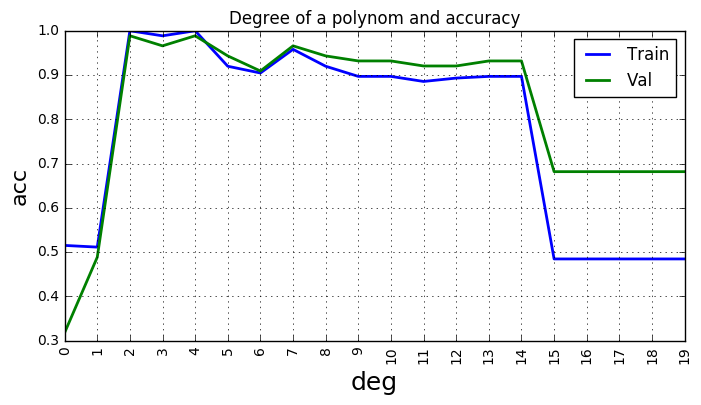

In [17]:
train, val = [], []
for i in range(0, 20):
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, deg=i)
    
    train.append(trainRes)
    val.append(valRes)
    
plot_deg_train_val('Degree of a polynom and accuracy', 'deg', 'acc', range(0, 20), train, val)

<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

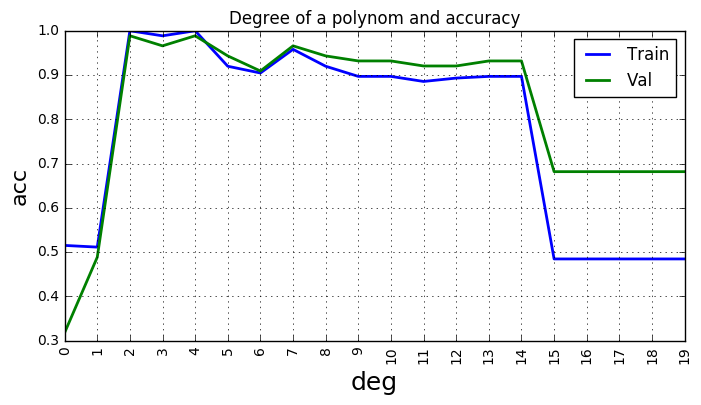

In [18]:
train = []
val = []
for i in range(0, 20):
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, deg=i)
    
    train.append(trainRes)
    val.append(valRes)
    
plot_deg_train_val('Degree of a polynom and accuracy', 'deg', 'acc', range(0, 20), train, val)

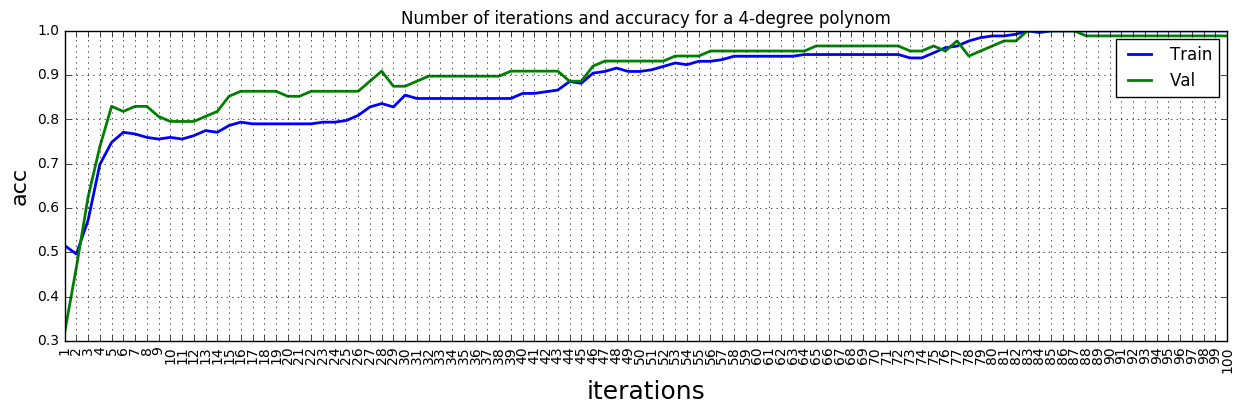

In [19]:
num = range(1,101)
train = []
val = []
for i in num:
    trainRes, valRes = log_regr_score(x_train, y_train, x_val, y_val, n=i)
    
    train.append(trainRes)
    val.append(valRes)

plot_deg_train_val('Number of iterations and accuracy for a 4-degree polynom', 'iterations', 'acc', num, train, val, width=15)

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [20]:
new_pl = Pipeline([("plF", PolynomialFeatures(degree=4)),
                        ("lgr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=84, 
                                                   C=1e5, solver="lbfgs", random_state=12345))])
new_pl = new_pl.fit(x_train_init, y_train_init)

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

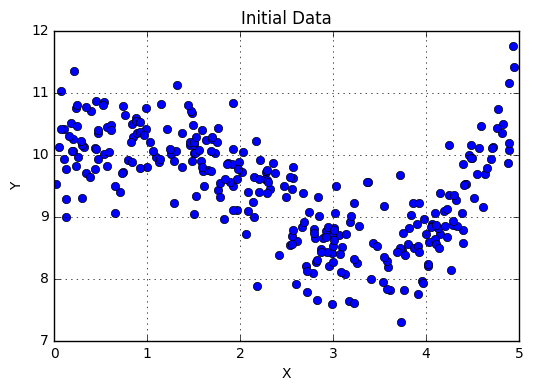

In [21]:
df = pd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [22]:
x = x.reshape(-1,1)
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)
pl_lin_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("rr", Ridge(alpha=0, fit_intercept=True, normalize=True))])
pl_lin_ridge = pl_lin_ridge.fit(x_train_init, y_train_init)

In [23]:
# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!
#Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))
#Для каждого значения коэф. регуляризации:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
k = np.logspace(-8, 1, 20, base=10)
train_res = []
val_res = []

kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

for a in alphas:
    train_deg = []
    val_deg = []
    pl_lin_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), 
                            ("rr", Ridge(alpha=a, fit_intercept=True, normalize=True))])
    for train, test in kf:
        pl_lin_ridge.fit(x_train_init[train], y_train_init[train])
        train_deg.append(mean_squared_error(y_train_init[train], pl_lin_ridge.predict(x_train_init[train])))
        val_deg.append(mean_squared_error(y_train_init[val], pl_lin_ridge.predict(x_train_init[val]))) 
    
    train_res.append(np.mean(train_deg))
    val_res.append(np.mean(val_deg))
mse_val = val_res

<p>3. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

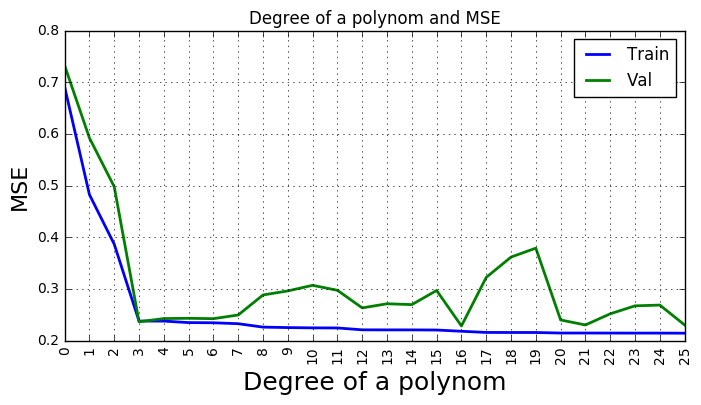

In [24]:
train, val = [], []

for i in range(0, 26):
    train_res, val_res = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val, metric=1)
    train.append(train_res)
    val.append(val_res)

plot_deg_train_val('Degree of a polynom and MSE', 'Degree of a polynom', 'MSE', range(0, 26), train, val)

<p>4. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

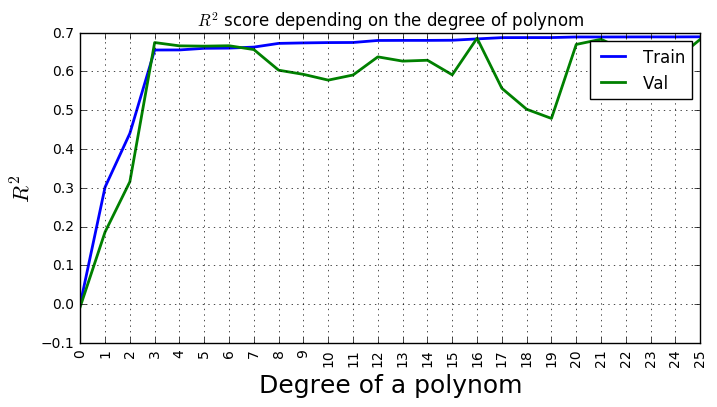

In [25]:
train, val = [], []

for i in range(0, 26):
    train_res, val_res = lin_regr_fit_metrics(i, x_train, y_train, x_val, y_val, metric=2)
    train.append(np.mean(train_res))
    val.append(np.mean(val_res))

    
plot_deg_train_val('$R^2$ score depending on the degree of polynom', 'Degree of a polynom', '$R^2$', range(0, 26), train, val)

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [26]:
a = alphas[list(mse_val).index(min(mse_val))]
alphas

array([  0.00000000e+00,   1.00000000e-08,   2.97635144e-08,
         8.85866790e-08,   2.63665090e-07,   7.84759970e-07,
         2.33572147e-06,   6.95192796e-06,   2.06913808e-05,
         6.15848211e-05,   1.83298071e-04,   5.45559478e-04,
         1.62377674e-03,   4.83293024e-03,   1.43844989e-02,
         4.28133240e-02,   1.27427499e-01,   3.79269019e-01,
         1.12883789e+00,   3.35981829e+00,   1.00000000e+01])

<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [27]:
pl_lin_ridge_alpha = Pipeline([("plF", PolynomialFeatures(degree=16)), ("rr", Ridge(alpha=0, fit_intercept=True, normalize=True))])
pl_lin_ridge_alpha = pl_lin_ridge_alpha.fit(x_train_init, y_train_init)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [28]:
mean_squared_error(y_test, pl_lin_ridge_alpha.predict(x_test))

0.26019336962200956

<p>10. Построить график регрессии</p>

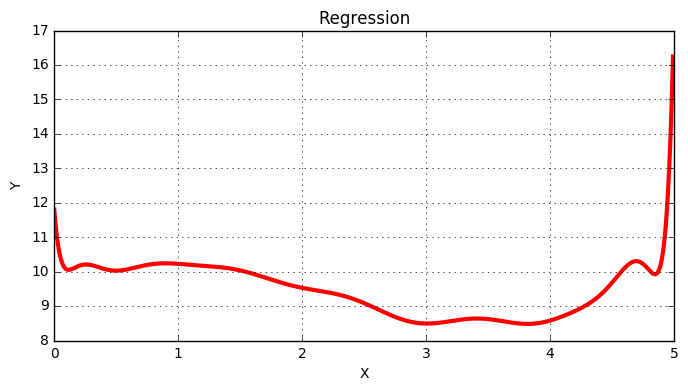

In [29]:
x = np.arange(0,5,.01)
plt.figure(1, figsize=[8,4])
plt.title("Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, pl_lin_ridge_alpha.predict(x.reshape(-1,1)), color='red', lw=3)
plt.grid(True)
plt.show()

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

In [30]:
# mse немного увеличилась, значит модель стала менее точной. 